In [1]:
import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import PandasTools
import zipfile
from io import BytesIO

import selfies as sf




c:\Users\lisa0\anaconda3\envs\LG_newmoses\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. SMILES to molecular structure
print molecule structures from generated data

In [2]:
#smiles = pd.read_csv('../checkpoints/ZINC_vae_done/vae_generated.csv')
smiles = pd.read_csv('../../NewMoses_results/ZINC_vae_20240515/vae_generated.csv')
smiles.head()

SMILES
0     O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1
1            CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1
2        CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1
3  O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2
4    Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F

In [7]:
smiles['ROMol'] = smiles['SMILES'].apply(Chem.MolFromSmiles)

[15:26:25] Can't kekulize mol.  Unkekulized atoms: 16 17 18
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 16 17 18
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 7
[15:26:25] SMILES Parse Error: unclosed ring for input: 'Cc1cc(C(=O)N2CC3CC(C(=O)NC4CC4C5C3)C(=O)N3C2CCC2)no1'
[15:26:25] SMILES Parse Error: unclosed ring for input: 'N#Cc1cccc(-c2cn3c(n2)N(C(=O)C2CCC2)CC(O)C2)c1'
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 3 4 6 9 18
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17
[15:26:25] SMILES Parse Error: unclosed ring for input: 'CC1CN(Cc2nc3sc4c(c3c(=O)n(C)c(=O)n3C)CCCC2)cs1'
[15:26:25] SMILES Parse Error: unclosed ring for input: 'COc1cccc(C(=O)N2CCC(O)(C3(C)C)CC2)c1F'
[15:26:25] SMILES Parse Error: extra close parentheses while parsing: CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1
[15:26:25] SMILES Parse Error: Failed parsing SMILES 'CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1' for input: 'CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1'
[15:26:25] SMILES Parse Err

In [8]:
smiles.head()

SMILES  \
0     O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1   
1            CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1   
2        CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1   
3  O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2   
4    Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F   

                                               ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
1  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
2  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
3  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
4  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...

c:\Users\lisa0\anaconda3\envs\LG_newmoses\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


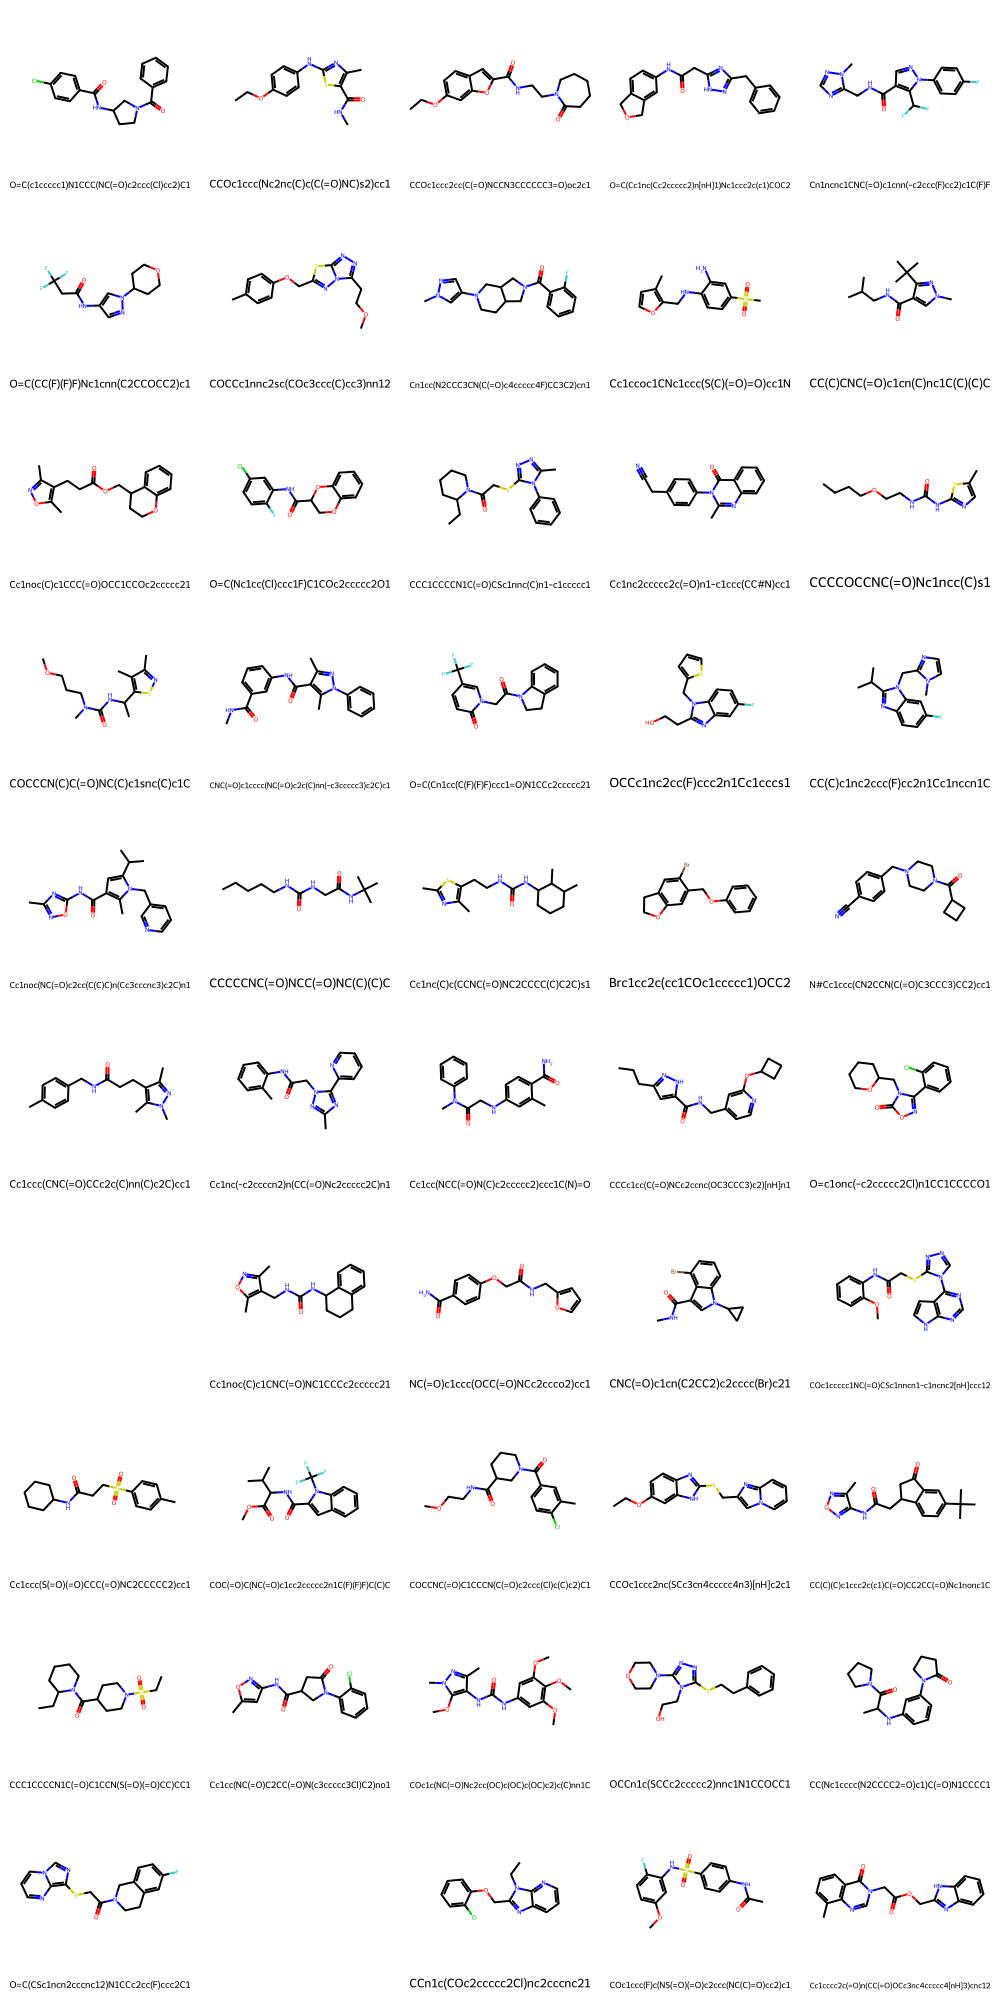

In [9]:
display(PandasTools.FrameToGridImage(smiles, column='ROMol', legendsCol='SMILES', molsPerRow=5))

In [10]:
smiles

SMILES  \
0           O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1   
1                  CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1   
2              CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1   
3        O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2   
4          Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F   
...                                              ...   
29995        CN(C)C(=O)c1cccc(NC(=O)COc2ccccc2C#N)c1   
29996                  COc1ccc(Cl)c2c1CCNC2c1cccnc1C   
29997            CC1(NC(=O)c2cc(F)ccc2Br)Cc2ccccc2C1   
29998        CC(c1ccco1)N(C)C(=O)c1cc(Cl)c2c(c1)OCO2   
29999  O=C(c1ccc(-c2cc[nH]n2)cc1)N1CCCN(c2ncccn2)CC1   

                                                   ROMol  
0      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
1      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
2      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
3      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
4      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
...                                                  ...  
29995  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29996  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29997  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29998  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29999  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  

[30000 rows x 2 columns]

# 2. Latent Space Visualization

In [2]:
import sys
sys.path.append("..")
import moses
from moses.vae import VAE
from moses.vae_property import VAEPROPERTY
from moses.utils import CharVocab, StringDataset, SELFIESVocab
from moses.vae.trainer import VAETrainer
from moses.vae_property.trainer import VAEPROPERTYTrainer 

from moses.metrics import QED, SA, logP
from moses.utils import get_mol

## 2.1. Calling model

### Functions for calling VAE models and forward encoding (not vae-prop models)

In [3]:
def get_vae_model(folder_path, config_file, model_file):
    config = torch.load(f'{folder_path}{config_file}')

    train = moses.get_dataset('train', config)
    vocab = CharVocab.from_data(train)
    vocab.vectors = torch.eye(len(vocab.c2i))

    model_path = f'{folder_path}{model_file}'

    model = VAE(vocab, config)
    model.load_state_dict(torch.load(model_path))
    return train, config, model

    

def get_sample(train, prop, size=50000):
    '''
    [Input]
    train: 
    prop: list of properties to calculate. 'QED', 'logP', 'SA' are available.
    '''
    
    size = size
    np.random.seed(0)
    rand_indices = np.random.choice(train.shape[0], size, replace=False)
    sample = train[rand_indices]

    if prop is None:
        return sample
    
    sample_mol = list(map(get_mol, sample))
    if 'QED' in prop:
        sample_qed = list(map(QED, sample_mol))
    else:
        sample_qed = None
    if 'logP' in prop:
        sample_logP = list(map(logP, sample_mol))
    else:
        sample_logP = None
    if 'SA' in prop:
        sample_sa = list(map(SA, sample_mol))
    else:
        sample_sa = None

    sample_prop = pd.DataFrame({'QED': sample_qed, 'logP': sample_logP, 'SA': sample_sa})
    return sample, sample_prop

def get_Z(config, model, sample):
    trainer = VAETrainer(config)
    sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

    Z = []

    for step, batch in enumerate(sample_loader):
        input_batch = tuple(data.to(model.device) for data in batch)
        z, _ = model.forward_encoder(input_batch)
        Z.extend(z.detach().cpu().numpy())

    Z = np.array(Z)

    return Z

### appendix: step by step of calling the models and samples

In [5]:
#config = torch.load('../checkpoints/ZINC_vae_done/vae_config.pt')
config = torch.load('../../NewMoses_results/ZINC_vae_20240515/vae_config.pt')

# vocab = torch.load('../checkpoints/ZINC_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

{'4', 'r', 'O', 'n', '-', '2', 'o', 'S', '6', 'l', ']', 's', '3', '5', '(', '=', 'B', 'C', '#', '[', 'H', '1', ')', 'c', 'F', 'N'}


In [28]:
#model_path = '../checkpoints/ZINC_vae_done/vae_model_080.pt'
model_path = '../../NewMoses_results/ZINC_vae_20240515/vae_model_080.pt'

model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [29]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [6]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))
sample_logP = list(map(logP, sample_mol))
sample_sa = list(map(SA, sample_mol))

In [30]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

## 2.2 Plotting embedding space function

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [5]:
def plot_emb(Z_vis, prop, prop_type, dataset, type):
    df = pd.DataFrame(np.transpose((Z_vis[:,0],Z_vis[:,1])))
    df.columns = ['x','y']

    if len(prop_type) == 1:
        df['prop']=prop[prop_type[0]]

        plt.figure(figsize=(12, 8))
        plt.scatter(x=df['x'], y=df['y'], c=df['prop'],
                    cmap= 'viridis', marker='.',
                    s=10,alpha=0.5, edgecolors='none')
        plt.title(f'{type} of latent space colored by {prop_type} of dataset {dataset}')
        plt.colorbar()

        plt.tight_layout()
        plt.show()
        return 

    if len(prop_type) == 2:
        fig, axs = plt.subplots(1,2, figsize=(12, 5))
        
    elif len(prop_type) == 3:
        fig, axs = plt.subplots(1,3, figsize=(18, 5))

    for i in range(len(prop_type)):
        df[f'prop{i}'] = prop[prop_type[i]]
        scatter = axs[i].scatter(x=df['x'], y=df['y'], c=df[f'prop{i}'],
                                cmap= 'viridis', marker='.',
                                s=10,alpha=0.5, edgecolors='none')
        axs[i].set_title(f'{type} of by {prop_type[i]} of dataset {dataset}')
        cbar = fig.colorbar(scatter, ax=axs[i])
        cbar.set_label(prop_type[i])

    plt.tight_layout()
    plt.show()


In [6]:
def calc_emb(Z, prop, prop_type, type=['PCA'], dataset='ZINC', plot=True, n_componenets=2):
    '''
    [Input]
    Z: latent space, numpy array of shape (n_samples, d_embedding)
    prop: property to color the latent space, dataframe of shape (n_samples, n_properties) with columns 'QED', 'logP', 'SA'
    prop_type: list containing the type of property to be colored. 'QED', 'logP', 'SA' are available.
    type: str, 'PCA' or 'TSNE'
    dataset: str, name of the dataset to be written in the title of the plot
    plot: bool, whether to plot the latent space or not
    n_components: int, number of components to reduce the latent space to
    '''
    # do pca and normalize
    if type == 'PCA':
        vis = PCA(n_components=2)
        Z_vis = vis.fit_transform(Z)
        Z_vis = MinMaxScaler().fit_transform(Z_vis)

        print(f'explained variance ratio: {vis.explained_variance_ratio_}')
    else:
        Z_vis = TSNE(n_components=2).fit_transform(Z)
        Z_vis = MinMaxScaler().fit_transform(Z_vis)

    if plot:
        plot_emb(Z_vis, prop, prop_type, dataset, type)

   
    return 

## 2.3. Implmentation

### ZINC VAE

In [ ]:
folder_path = '../../NewMoses_results/ZINC_vae_20240515/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

train, config, model = get_vae_model(folder_path, config_file, model_file)
sample, sample_prop = get_sample(train, ['QED', 'logP', 'SA'])
Z = get_Z(config, model, sample)

explained variance ratio: [0.00824363 0.00823242]


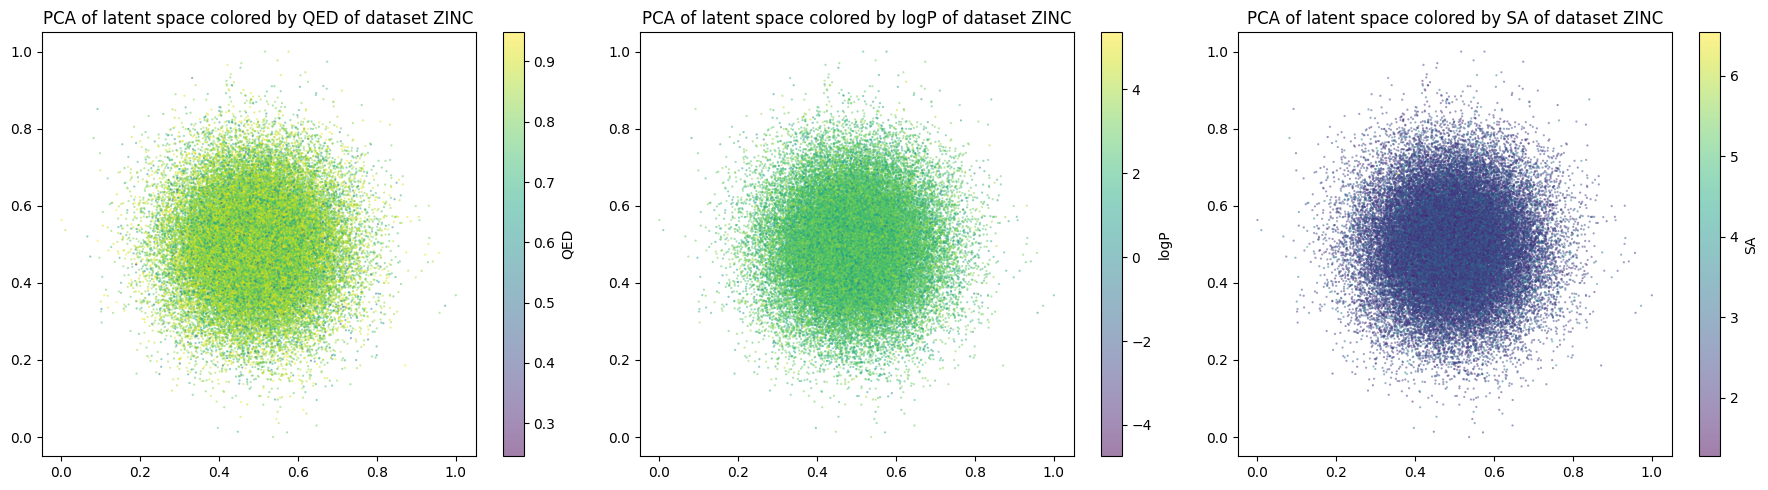

In [ ]:
calc_emb(Z, sample_prop, prop_type=['QED', 'logP', 'SA'], type='PCA')

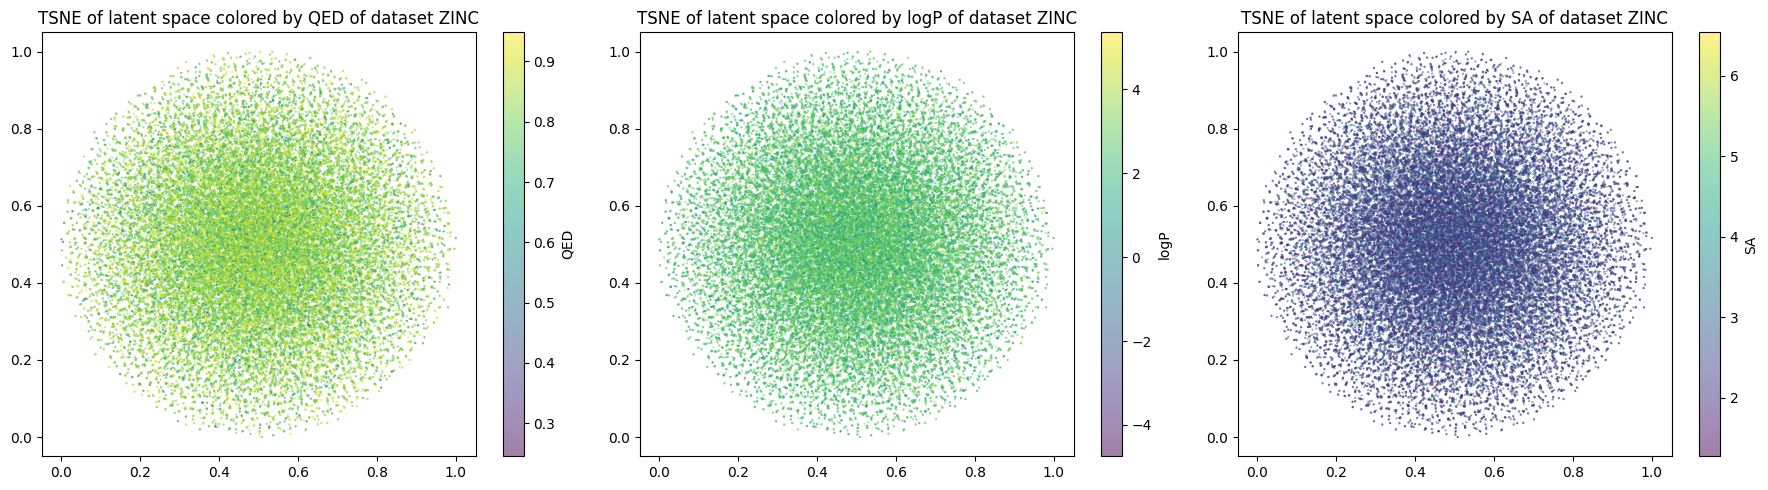

In [69]:
calc_emb(Z, sample_prop, prop_type=['QED', 'logP', 'SA'], type='TSNE')

### QM9 VAE

In [ ]:
folder_path = '../../NewMoses_results/QM9_vae_20240515/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

train_qm9, config_qm9, model_qm9 = get_vae_model(folder_path, config_file, model_file)
sample_qm9, sample_prop_qm9 = get_sample(train_qm9, ['QED', 'logP', 'SA'])
Z_qm9 = get_Z(config, model, sample)

{'4', 'O', 'n', '-', '2', 'o', ']', '3', '5', '(', '=', 'C', '#', '[', 'H', ')', '1', 'c', 'F', 'N'}


explained variance ratio: [0.0082723  0.00820822]


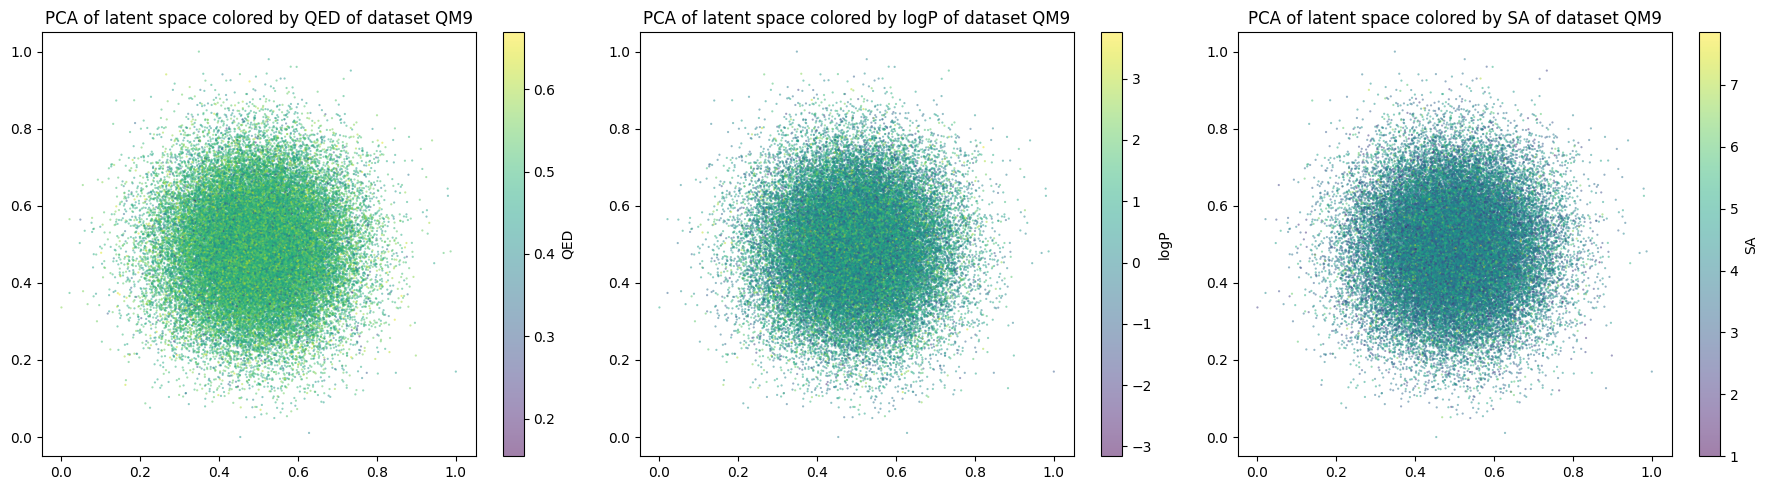

In [ ]:
calc_emb(Z_qm9, sample_prop_qm9, prop_type=['QED', 'logP', 'SA'], type='PCA', dataset='QM9')

In [ ]:
calc_emb(Z_qm9, sample_prop_qm9, prop_type=['QED', 'logP', 'SA'], type='TSNE')

### SELFIES ZINC
Check if it wokrs. Might not be working --> MODIFY THE CODE

In [ ]:
## SELFIES ZINC
folder_path = '../../NewMoses_results/ZINC_SELFIES_vae_20240522_135605/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

config_zinc_self = torch.load(f'{folder_path}{config_file}')

file_path = '../moses/dataset/data/ZINC/train.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:    
        file = 'train.csv'
        with zip_ref.open(file) as file:
            # Read the CSV file into a pandas DataFrame
            df= pd.read_csv(BytesIO(file.read()), header=0)
            train_zinc_self = df['SELFIES'].values

vocab_zinc_self = CharVocab.from_data(train_zinc_self)
vocab_zinc_self.vectors = torch.eye(len(vocab_zinc_self.c2i))

model_path = f'{folder_path}{model_file}'


In [ ]:
model_zinc_self = VAE(vocab_zinc_self, config_zinc_self)
model_zinc_self.load_state_dict(torch.load(model_path))

sample_zinc_self, sample_prop_zinc_self = get_sample(train_zinc_self, ['QED'])
Z_zinc_self = get_Z(config_zinc_self, model_zinc_self, sample_zinc_self)

In [ ]:
calc_emb(Z_zinc_self, sample_prop_zinc_self, prop_type=['QED', 'logP', 'SA'], type='PCA')

### SELFIES PROP ZINC
Doesn't work with the functions. Used step by step approach

In [147]:
folder_path = '../../NewMoses_results/ZINC_vae_property_20240528_051033/'
config_file = 'vae_property_config.pt'
model_file = 'vae_property_model_080.pt'
#config = torch.load('../checkpoints/ZINC_vae_done/vae_config.pt')
config_prp = torch.load(f'{folder_path}{config_file}')

In [148]:
config_prp.kl_w_end

0.005

In [149]:
file_path = '../moses/dataset/data/ZINC/train.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:    
        file = 'train.csv'
        with zip_ref.open(file) as file:
            # Read the CSV file into a pandas DataFrame
            df= pd.read_csv(BytesIO(file.read()), header=0)
            cols = ['logP', 'qed', 'SAS']
            cols.insert(0, 'SELFIES' if config_prp.use_selfies else 'SMILES')
            train_prp = df[cols].values


In [150]:
if config_prp.use_selfies:
    train_prp_vocab = df['SELFIES'].values
else:
    train_prp_vacab = df['SMILES'].values

In [151]:
vocab_prp = CharVocab.from_data(train_prp_vocab, use_selfies=config_prp.use_selfies)
vocab_prp.vectors = torch.eye(len(vocab_prp.c2i))

------- Using SELFIES: True -------
{'Branch2', 'H', 'Cl', '=Ring2', 'Ring1', '#C', '=C', '#N', 'C', '=N', 'F', '=Branch1', '=Ring1', '#Branch1', 'Ring2', 'Br', 'S', '=S', 'NH1', '=Branch2', '=O', 'N', 'P', 'O', '#Branch2', 'Branch1'}


In [152]:
#model_path = '../checkpoints/ZINC_vae_done/vae_model_080.pt'
model_path = f'{folder_path}{model_file}'

model_prp = VAEPROPERTY(vocab_prp, config_prp)
model_prp.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [153]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train_prp_vocab.shape[0], size, replace=False)
sample_prp = train_prp[rand_indices]

In [154]:
sample_prp[:,0][0]

'[C][O][C][C][C][C][S][C][=N][C][=C][Branch1][Branch2][C][=Branch1][C][=O][NH1][Ring1][#Branch1][C][C][C][Ring1][Branch2]'

In [155]:
# use rdkit to transform selfies to smiles
if config_prp.use_selfies:
    sample_prp_smiles = [sf.decoder(s) for s in sample_prp[:,0]]


In [156]:
sample_mol_prp = list(map(get_mol, sample_prp_smiles))
sample_qed_prp = list(map(QED, sample_mol_prp))
sample_logP_prp = list(map(logP, sample_mol_prp))
sample_sa_prp = list(map(SA, sample_mol_prp))
sample_prop_prp = pd.DataFrame({'QED': sample_qed_prp, 'logP': sample_logP_prp, 'SA': sample_sa_prp})
#sample_prop_prp = pd.DataFrame({'QED': sample_qed_prp})

In [157]:
trainer_prp = VAEPROPERTYTrainer(config_prp)
sample_loader = trainer_prp.get_dataloader(model_prp, sample_prp, shuffle=False)

In [ ]:
model_prp.eval()

In [159]:
Z_prp = []
preds = []
MU = []

for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model_prp.device) for data in batch[0])
    mu, z, _ = model_prp.forward_encoder(input_batch)
    Z_prp.extend(z.detach().cpu().numpy())

    _, pred = model_prp.forward_prop_predictor(mu, batch[1][0])
    preds.extend(pred.detach().cpu().numpy())
    MU.extend(mu.detach().cpu().numpy())
Z_prp = np.array(Z_prp)
preds = np.array(preds)
MU = np.array(MU)

In [160]:
sample_prop_pred = pd.DataFrame(preds, columns=['logP', 'QED', 'SA'])

explained variance ratio: [0.01020275 0.0090236 ]


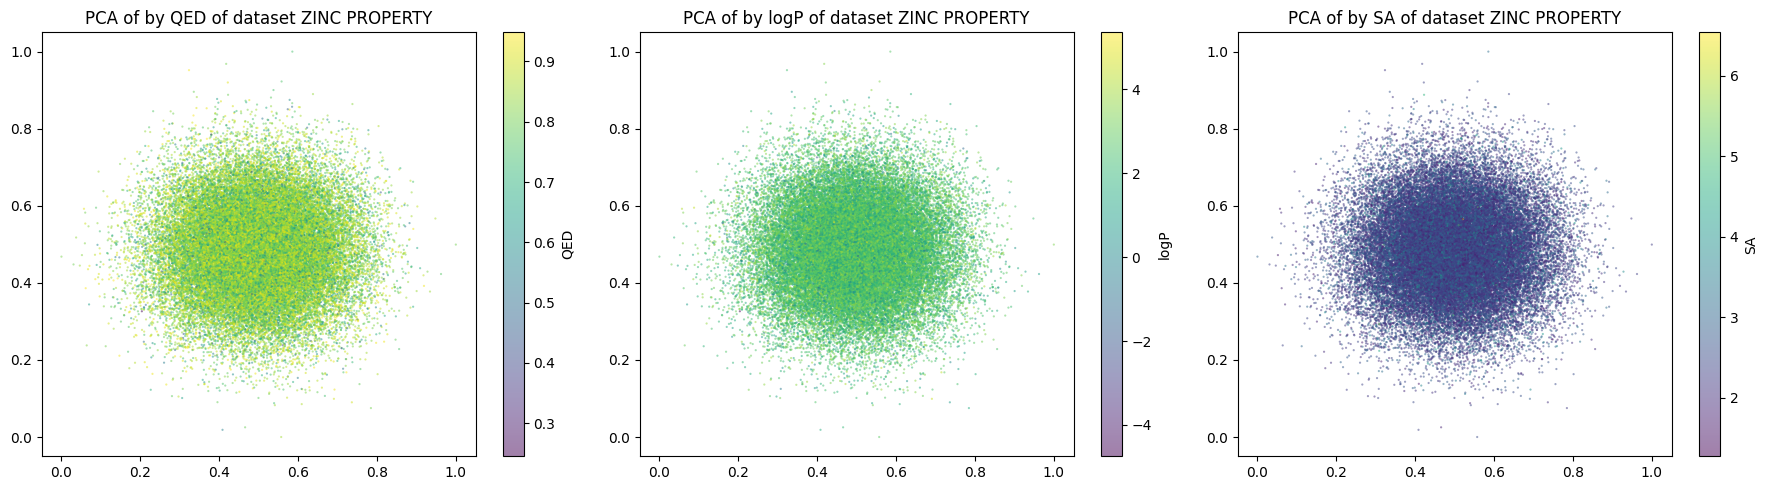

In [161]:
calc_emb(Z_prp, sample_prop_prp, prop_type=['QED','logP', 'SA'], type='PCA', dataset='ZINC PROPERTY')

explained variance ratio: [0.01031501 0.00898052]


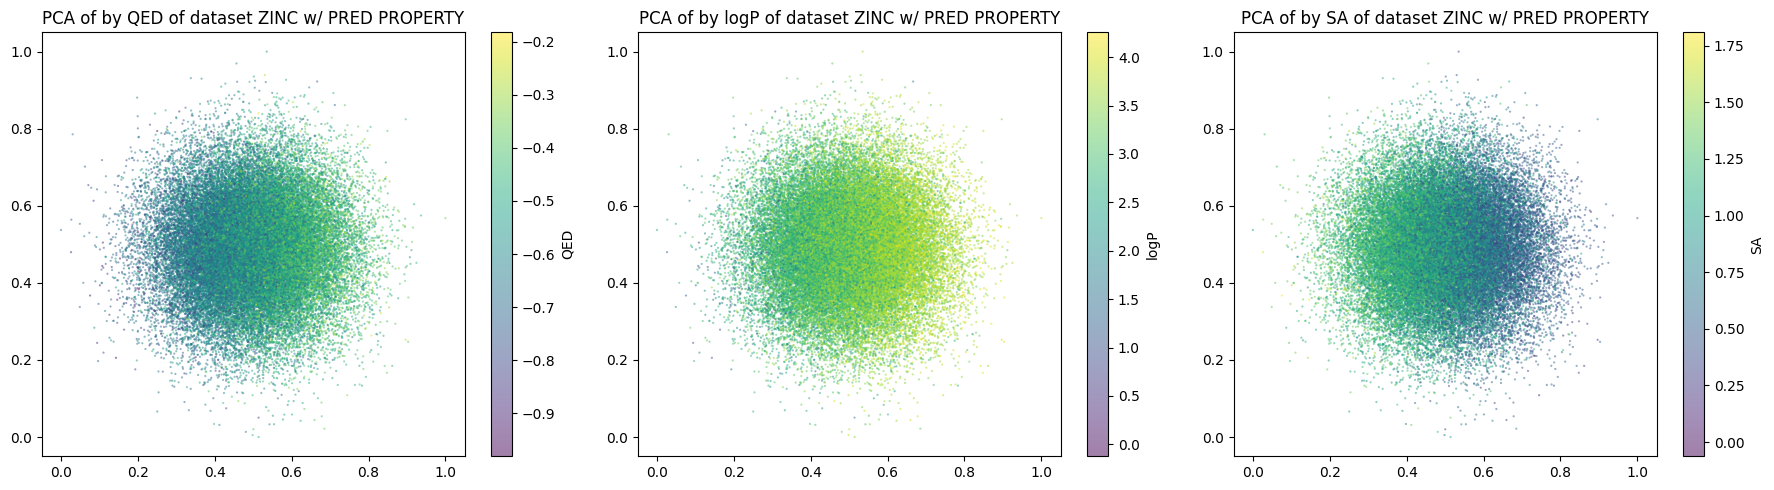

In [162]:
calc_emb(Z_prp, sample_prop_pred, prop_type=['QED', 'logP', 'SA'], type='PCA', dataset='ZINC w/ PRED PROPERTY')

In [164]:
# print the range of sample_prop_pred for each column
# print the range of sample_prop_prp for each column
# organize in a dataframe
# plot the range of each column

print('ground truth properties for 50000 samples')
print(sample_prop_prp.describe())
print('predicted properties for 50000 samples')
print(sample_prop_pred.describe())



ground truth properties for 50000 samples
                QED          logP            SA
count  50000.000000  50000.000000  50000.000000
mean       0.806472      2.443273      2.450688
std        0.095077      0.930154      0.463323
min        0.245325     -4.748100      1.269395
25%        0.758216      1.884415      2.120359
50%        0.822536      2.563790      2.383285
75%        0.876518      3.117700      2.714743
max        0.948251      5.362220      6.542437
predicted properties for 50000 samples
               logP           QED            SA
count  50000.000000  50000.000000  50000.000000
mean       3.188550     -0.558298      0.897474
std        0.523969      0.120550      0.308172
min       -0.123329     -0.980902     -0.062789
25%        2.866601     -0.646621      0.622279
50%        3.238731     -0.564028      0.935437
75%        3.593381     -0.466520      1.141534
max        4.256328     -0.182325      1.808614


### SELFIES ZINC PROP decoder
To be modified

In [212]:
sample_prp.shape

(50000, 4)

In [213]:
sample_prp_df = pd.DataFrame(sample_prp, columns=['SELFIES', 'logP', 'QED', 'SA'])
sample_prp_df = sample_prp_df[['SELFIES', 'QED', 'logP', 'SA']]
sample_prp_df = sample_prp_df[:2048]
sample_prp_df.head()

SELFIES       QED     logP  \
0  [C][O][C][C][C][C][S][C][=N][C][=C][Branch1][B...   0.47744   1.7773   
1  [C][C][=C][S][C][=Branch1][C][=O][N][Ring1][=B...  0.920477  2.23052   
2  [C][C][=C][C][=C][C][Branch2][Ring1][=Branch1]...  0.916358  3.64622   
3  [C][C][=C][C][=C][Branch2][Ring1][Branch2][C][...  0.925364  2.61282   
4  [C][N][C][Branch1][N][C][=C][C][=C][C][Branch1...  0.682311   3.1007   

         SA  
0  2.629071  
1  2.108029  
2  2.182469  
3  2.260791  
4  2.308511

In [214]:
trainer_prp = VAEPROPERTYTrainer(config_prp)
sample_loader = trainer_prp.get_dataloader(model_prp, sample_prp, shuffle=False)

for i, batch in enumerate(sample_loader):
    mu, z, _ = model_prp.forward_encoder(batch[0])
    break

In [215]:
sample_prp_df['mu'] = mu.detach().cpu().numpy().tolist()
sample_prp_df['z'] = z.detach().cpu().numpy().tolist()
sample_prp_df['mu'] = sample_prp_df['mu'].apply(np.array)
sample_prp_df['z'] = sample_prp_df['z'].apply(np.array)
sample_prp_df.head()


SELFIES       QED     logP  \
0  [C][O][C][C][C][C][S][C][=N][C][=C][Branch1][B...   0.47744   1.7773   
1  [C][C][=C][S][C][=Branch1][C][=O][N][Ring1][=B...  0.920477  2.23052   
2  [C][C][=C][C][=C][C][Branch2][Ring1][=Branch1]...  0.916358  3.64622   
3  [C][C][=C][C][=C][Branch2][Ring1][Branch2][C][...  0.925364  2.61282   
4  [C][N][C][Branch1][N][C][=C][C][=C][C][Branch1...  0.682311   3.1007   

         SA                                                 mu  \
0  2.629071  [-0.09041718393564224, -0.04561741277575493, -...   
1  2.108029  [-0.04584881663322449, -0.030232958495616913, ...   
2  2.182469  [-0.07910504937171936, -0.05080296844244003, -...   
3  2.260791  [-0.12771199643611908, -0.07476182281970978, -...   
4  2.308511  [-0.11169568449258804, -0.06291687488555908, -...   

                                                   z  
0  [-0.8135378360748291, 0.5518555641174316, -0.3...  
1  [0.7977069616317749, -2.0800886154174805, 0.11...  
2  [0.9614791870117188, 0.1907384991645813, 1.295...  
3  [0.07429657876491547, -0.9630908966064453, -2....  
4  [-2.553274393081665, -0.5180108547210693, 0.66...

In [216]:
# interps : mu to decode
interps = [mu for mu in sample_prp_df['mu'].values]
interps = np.array(interps)
interps_torch = torch.from_numpy(interps)
interps_torch = torch.tensor(interps_torch, dtype=torch.float32)
model_prp.eval()
print(interps_torch.shape)
#sampled, new_x = model.sample(n, z=torch.from_numpy(np.zeros((8, 128), dtype=np.float32)), test=True) 
sampled = model_prp.sample(2048, z=interps_torch, temp=1.0, test=True)
sample_prp_df['pred SELFIES'] = sampled

C:\Users\lisa0\AppData\Local\Temp\ipykernel_37308\3494722909.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


torch.Size([2048, 128])


In [217]:
# sample_prp_df['pred Romol'] = sample_prp_df['pred SMILES'].apply(Chem.MolFromSmiles)
sample_prp_df.head()

SELFIES       QED     logP  \
0  [C][O][C][C][C][C][S][C][=N][C][=C][Branch1][B...   0.47744   1.7773   
1  [C][C][=C][S][C][=Branch1][C][=O][N][Ring1][=B...  0.920477  2.23052   
2  [C][C][=C][C][=C][C][Branch2][Ring1][=Branch1]...  0.916358  3.64622   
3  [C][C][=C][C][=C][Branch2][Ring1][Branch2][C][...  0.925364  2.61282   
4  [C][N][C][Branch1][N][C][=C][C][=C][C][Branch1...  0.682311   3.1007   

         SA                                                 mu  \
0  2.629071  [-0.09041718393564224, -0.04561741277575493, -...   
1  2.108029  [-0.04584881663322449, -0.030232958495616913, ...   
2  2.182469  [-0.07910504937171936, -0.05080296844244003, -...   
3  2.260791  [-0.12771199643611908, -0.07476182281970978, -...   
4  2.308511  [-0.11169568449258804, -0.06291687488555908, -...   

                                                   z  \
0  [-0.8135378360748291, 0.5518555641174316, -0.3...   
1  [0.7977069616317749, -2.0800886154174805, 0.11...   
2  [0.9614791870117188, 0.1907384991645813, 1.295...   
3  [0.07429657876491547, -0.9630908966064453, -2....   
4  [-2.553274393081665, -0.5180108547210693, 0.66...   

                                        pred SELFIES  
0  CC=Branch1C=ONCBranch2Ring1=Branch1CCBranch2Ri...  
1  CCBranch2Ring2=Branch1C=Branch1C=ONCBranch2Rin...  
2  CCBranch2Ring2=Branch1CC=Branch1C=ONCBranch2Ri...  
3  CCBranch2Ring2=Branch1CC=Branch1C=ONCBranch2Ri...  
4  CCBranch2Ring2=Branch1CC=Branch1C=ONCBranch2Ri...

# 3. print interpolated molecule structure

In [7]:
def lin_interp(x,y,t):
    '''
    x: starting point
    y: ending point
    t: interpolation parameter
    '''
    return t*y + (1-t)*x

In [8]:
def slerp(low, high, val):
    '''
    low: starting point
    high: ending point
    val: interpolation parameter between 0 and 1
    '''
    omega = np.arccos(np.dot(low/np.linalg.norm(low), high/np.linalg.norm(high)))
    so = np.sin(omega)
    return np.sin((1.0-val)*omega) / so * low + np.sin(val*omega)/so * high

In [22]:
def print_interp(start, end, n, type='slerp', test=True):
    '''
    i: index of the first molecule
    j: index of the second molecule
    n: number of interpolation points
    type: interpolation type, either 'slerp' or 'linear'
    '''
    start = start
    end = end
    t_vals = np.linspace(0, 1, n)
    if type == 'slerp':
        interps = [slerp(start, end, t) for t in t_vals]
    else:
        interps = [lin_interp(start, end, t) for t in t_vals]
    interps = np.array(interps)
    interps_torch = torch.from_numpy(interps)
    interps_torch = torch.tensor(interps_torch, dtype=torch.float32)

    model.eval()
    print(interps_torch.shape)
    #sampled, new_x = model.sample(n, z=torch.from_numpy(np.zeros((8, 128), dtype=np.float32)), test=True) 
    sampled = model.sample(n, z=interps_torch, temp=1.0, test=test)

    sampled_df = pd.DataFrame(sampled, columns=['SMILES'])
    sampled_df['Romol'] = sampled_df['SMILES'].apply(Chem.MolFromSmiles)
    display(PandasTools.FrameToGridImage(sampled_df, column='Romol', legendsCol='SMILES', molsPerRow=4))
    print(f'sample length: {len(sampled_df)}')

    return interps, sampled_df

## 3.1. Intepolation by selecting random molecules
select random molescule --> encode --> interpolate in latent space --> decode

In [70]:
config = torch.load('../../NewMoses_results/ZINC_vae_20240515/vae_config.pt')

# vocab = torch.load('../checkpoints/ZINC_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

model_path = '../../NewMoses_results/ZINC_vae_20240515/vae_model_060.pt'

model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

{'H', '6', 'r', '#', ']', '(', '=', '-', ')', 'C', '4', 'c', 'F', 's', 'S', 'B', '1', '5', 'n', 'o', 'N', '2', 'O', '[', 'l', '3'}


<All keys matched successfully>

In [71]:
traindata_path = '../moses/dataset/data/ZINC/train.csv'
train_molecule = pd.read_csv(traindata_path)
n = 100
selected_mol = train_molecule.sample(n=n)[['SMILES']]
#selected_gen['ROMol'] = selected_gen['SMILES'].apply(Chem.MolFromSmiles)
selected_mol = selected_mol.reset_index(drop=True)
selected_mol

SMILES
0           Cn1ccnc1S(=O)(=O)Cc1csc(-c2ccsc2)n1
1   Cc1cc(-c2cnn(CCNC(=O)c3cc[nH]n3)c2C2CC2)on1
2       Cc1ocnc1C(=O)NC1CC(=O)N(Cc2ccc(F)cc2)C1
3     O=C(NCCN1CCN(C(=O)c2ccc(F)cc2)CC1)c1ccco1
4          CSc1ccc(-c2csc(NC(=O)c3ccccn3)n2)cc1
..                                          ...
95        Cc1cc(C)n(C2CN(c3ncnc4[nH]ccc34)C2)n1
96   CC(C1CC1)N(C(=O)Nc1ccc(C(N)=O)c(F)c1)C1CC1
97     COc1cc(OC)c(NC(=O)c2cn3c(C)cccc3n2)cc1Cl
98             CCCCOc1ccc(C(=O)N2CCC(O)C2)cc1OC
99          O=C(CCSc1nnc(N2CCCC2)s1)c1ccc(F)cc1

[100 rows x 1 columns]

In [72]:
selected_smiles = np.array(selected_mol['SMILES'].tolist())


In [73]:
from torch.utils.data import DataLoader

selected_dataset = StringDataset(vocab, selected_smiles)
selected_dataloader = DataLoader(
    selected_dataset, batch_size=n,
    shuffle=False, collate_fn=selected_dataset.default_collate
)
for i, batch in enumerate(selected_dataloader):
    mu, z, _ = model.forward_encoder(batch[0].T)
    if i == 0:
        Z = torch.empty((0, z.shape[1]))
        MU = torch.empty((0, mu.shape[1]))
    # do pca and normalize
    Z = torch.cat((Z, z), dim=0)
    MU = torch.cat((MU, mu), dim=0)
    
Z = Z.detach().numpy()
MU = MU.detach().numpy()
sampled_Z = Z
sampled_MU = MU

In [74]:
sampled_batch = batch[0].transpose(0,1)

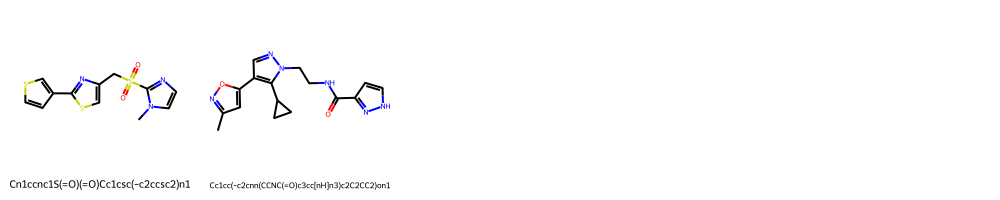

In [75]:
selected_mol['RoMol'] = selected_mol['SMILES'].apply(Chem.MolFromSmiles)
display(PandasTools.FrameToGridImage(selected_mol[:2], column='RoMol', legendsCol='SMILES', molsPerRow=5))

C:\Users\lisa0\AppData\Local\Temp\ipykernel_37308\1062102139.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


torch.Size([8, 128])


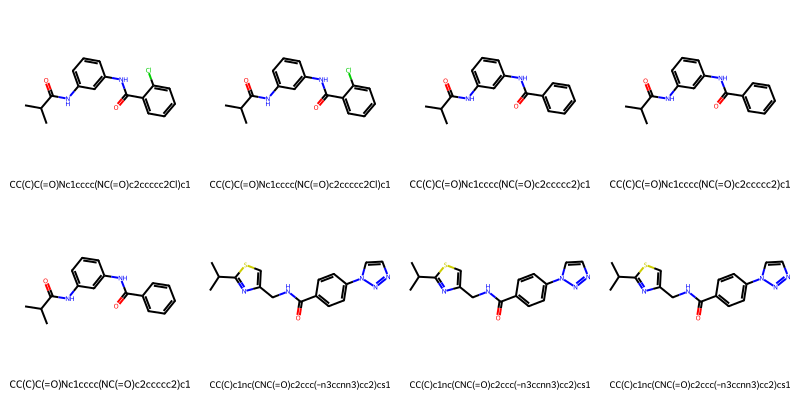

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_37308\1062102139.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


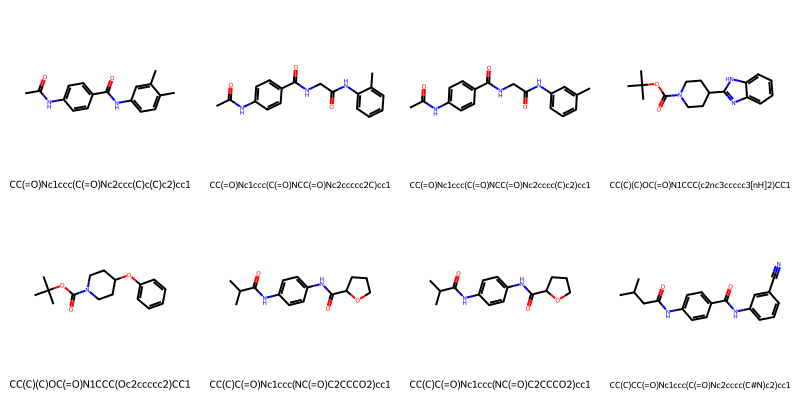

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_37308\1062102139.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


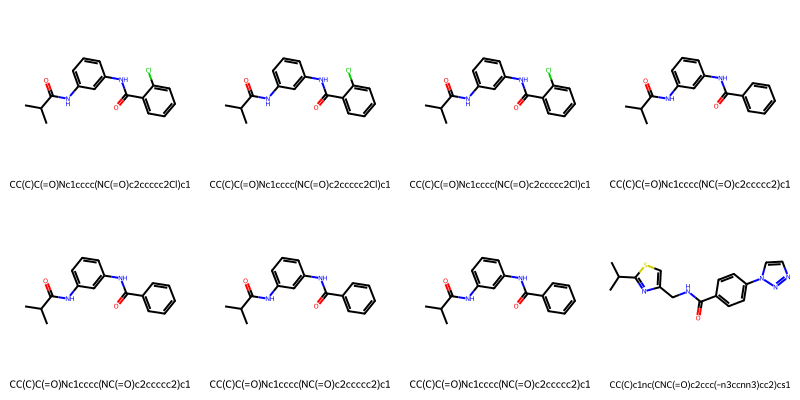

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_37308\1062102139.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


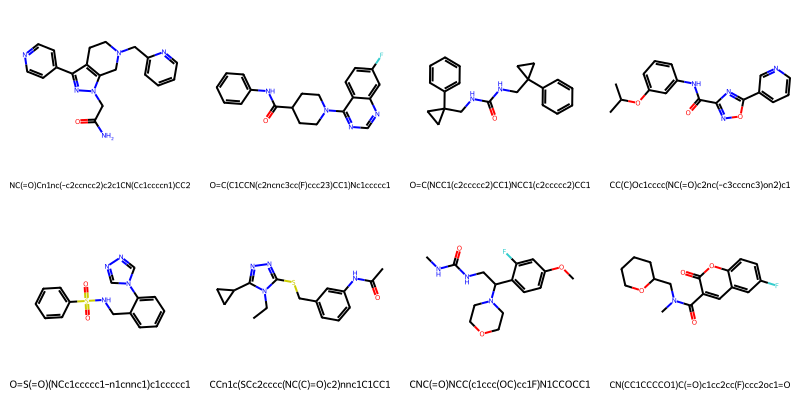

sample length: 8


In [76]:
slerp_emb, sampled_df_slerp = print_interp(sampled_MU[0], sampled_MU[4], 8, type='slerp', test=True)
slerp_emb, sampled_df_slerp = print_interp(sampled_Z[0], sampled_Z[4], 8, type='slerp', test=True)

slerp_emb, sampled_df_lin = print_interp(sampled_MU[0], sampled_MU[1], 8, type='linear', test=True)
slerp_emb, sampled_df_rand = print_interp(sampled_MU[0], sampled_MU[1], 8, type='slerp', test=False)

torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_37308\1062102139.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


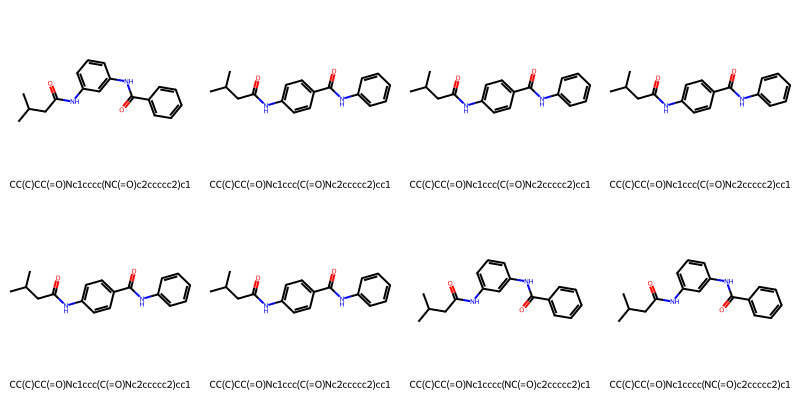

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_37308\1062102139.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


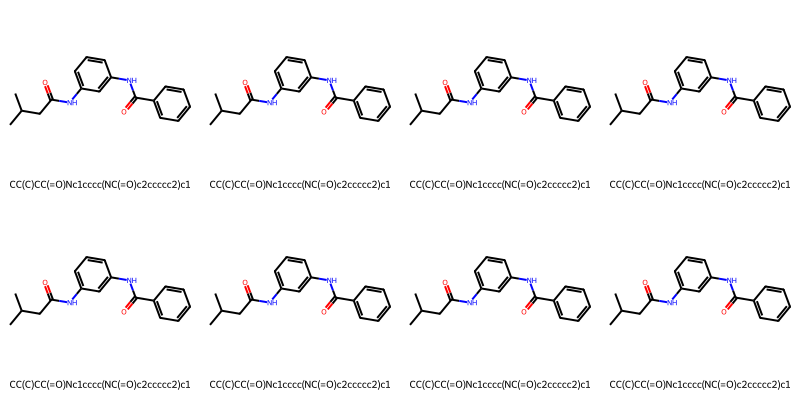

sample length: 8


ValueError: not enough values to unpack (expected 3, got 2)

In [62]:
slerp_emb, sampled_df_slerp = print_interp(sampled_Z[0], sampled_Z[1], 8, type='slerp', test=True)
slerp_emb, y_lin, sampled_df_lin = print_interp(sampled_Z[0], sampled_Z[1], 8, type='linear', test=True)
slerp_emb, y_rand, sampled_df_rand = print_interp(sampled_Z[0], sampled_Z[1], 8, type='slerp', test=False)

## 3.2. Interpolation by PCA inverse

In [29]:
folder_path = '../../NewMoses_results/ZINC_vae_20240515/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

train, config, model = get_vae_model(folder_path, config_file, model_file)
sample = get_sample(train, None)
Z = get_Z(config, model, sample)

{'l', '1', 'C', 'B', '[', ')', '6', '2', '3', 'O', '5', '(', '#', ']', 'H', 'F', 'r', 'c', 's', 'n', 'o', '-', '=', 'S', '4', 'N'}


In [31]:
pca = PCA(n_components=2)
pca_Z = pca.fit_transform(Z)
scaler = MinMaxScaler()
scaled_Z = scaler.fit_transform(pca_Z)

#plot_emb(scaled_Z, sample_prop, ['QED'], 'ZINC', 'PCA')

In [32]:
sample_point = np.array([[0.0, 0.5],[1.0, 0.65]] )


In [33]:
undo_scale = scaler.inverse_transform(sample_point)
recon_sample = pca.inverse_transform(undo_scale)

C:\Users\lisa0\AppData\Local\Temp\ipykernel_32096\3511270469.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


torch.Size([8, 128])


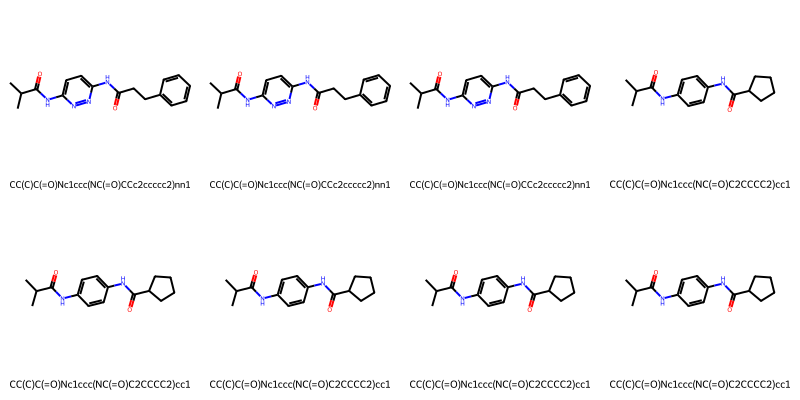

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_32096\3511270469.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


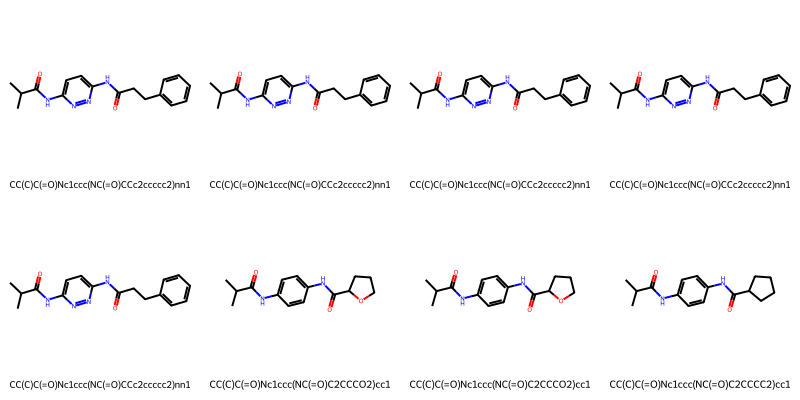

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_32096\3511270469.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


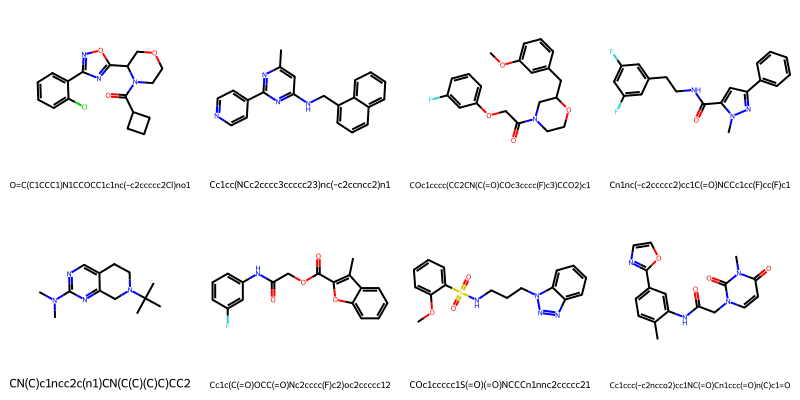

sample length: 8


In [34]:
slerp_emb, y1, sampled_df1 = print_interp(recon_sample[0], recon_sample[1], 8, type='slerp', test=True)
slerp_emb, y2, sampled_df2 = print_interp(recon_sample[0], recon_sample[1], 8, type='linear', test=True)
slerp_emb, y3, sampled_df3 = print_interp(recon_sample[0], recon_sample[1], 8, type='slerp', test=False)


## 3.3 Similarity check

In [174]:
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from rdkit import DataStructs

In [219]:
fpgen = AllChem.GetRDKitFPGenerator()
fps = [fpgen.GetFingerprint(x) for x in sampled_df_lin['Romol']]
DataStructs.TanimotoSimilarity(fps[0],fps[1])

0.2719836400817996

In [227]:
# get tanimoto similarity between fps[0] and fps[1]
# without using datastructs
def calc_simi(df_romol):
    fpgen = AllChem.GetRDKitFPGenerator()
    fps = [fpgen.GetFingerprint(x) for x in df_romol]

    similarities = []
    for i in range(len(fps)-1):
        similarity = DataStructs.TanimotoSimilarity(fps[i],fps[i+1])
        similarities.append(similarity)

    return similarities


In [228]:
simi_lin = calc_simi(sampled_df_lin['Romol'])
simi_slerp = calc_simi(sampled_df_slerp['Romol'])
simi_rand = calc_simi(sampled_df_rand['Romol'])

In [229]:
print(simi_lin)
print(simi_slerp)
print(simi_rand)

[0.2719836400817996, 0.23190184049079754, 0.267515923566879, 0.25316455696202533, 0.19624819624819625, 0.2183507549361208, 0.20599250936329588]
[0.22430741733690795, 0.14097496706192358, 0.4396135265700483, 0.16623150565709313, 0.3211920529801324, 0.21753246753246752, 0.4670750382848392]
[0.27677224736048267, 0.31235247836349334, 0.38461538461538464, 0.3856707317073171, 0.28244972577696525, 0.3340909090909091, 0.25630914826498424]


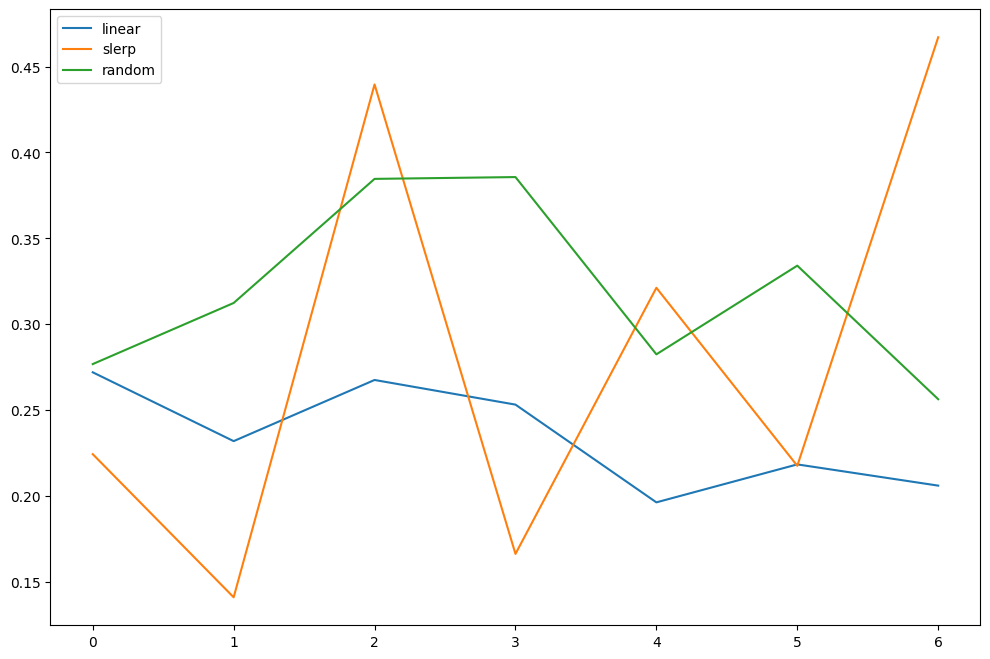

In [226]:
# plot simi_lin, simi_slerp, simi_rand
plt.figure(figsize=(12,8))
plt.plot(simi_lin, label='linear')
plt.plot(simi_slerp, label='slerp')
plt.plot(simi_rand, label='random')
plt.legend()
plt.show()